In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
# Open the earthquake data file.
filename = './/SSNMX_catalogo_20170901_20210510_lat12d85_18d66_lon-97d26_-88d69.csv'
df = pd.read_csv ('.//SSNMX_catalogo_20170901_20210510_lat12d85_18d66_lon-97d26_-88d69.csv', skiprows=4)

df = df.dropna()
print(df)

            Fecha      Hora  Magnitud  Latitud  Longitud  Profundidad  \
0      2017-09-01  01:26:16       3.4  15.9832  -96.9505         25.8   
1      2017-09-01  01:29:47       3.5  16.6938  -95.1257         94.8   
2      2017-09-01  02:10:55       3.8  15.5425  -92.4787        187.6   
3      2017-09-01  02:15:28       3.5  16.0508  -97.1588         26.3   
4      2017-09-01  02:24:18       3.6  17.1730  -94.9790        121.0   
...           ...       ...       ...      ...       ...          ...   
54557  2021-05-10  02:10:19       3.8  15.9500  -95.6600         54.0   
54558  2021-05-10  02:15:51       3.9  17.4100  -94.8400        144.0   
54559  2021-05-10  03:35:19       3.9  14.9200  -94.0200         14.0   
54560  2021-05-10  05:13:42       4.5  14.0000  -92.1500         43.0   
54561  2021-05-10  08:41:23       4.0  16.5000  -95.3100         86.0   

                       Referencia de localizacion   Fecha UTC  Hora UTC  \
0       18 km al NORESTE de PUERTO ESCONDIDO, OA

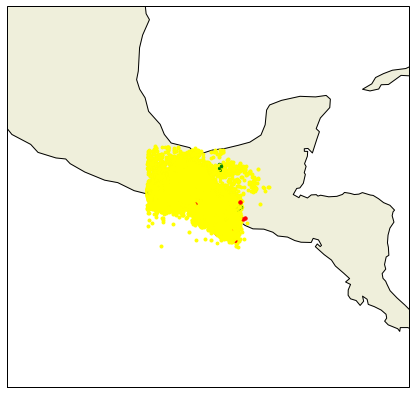

In [51]:
# Create empty lists for the data we are interested in.

#timestrings = df['Hora UTC'].to_numpy()


lats=df['Latitud'].to_numpy()
lons=df['Longitud'].to_numpy()
magnitudes= df['Magnitud'].to_numpy()

fig, ax = plt.subplots(figsize=(12,7))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=300)) # try centering the map somewhere else
ax.set_extent([lons.min()-8, lons.max()+8, lats.min()-8, lats.max()+8])
#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(states_provinces, edgecolor='gray')
#ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
#ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

norm = matplotlib.colors.Normalize(vmin=magnitudes.min(), vmax=magnitudes.max())

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('green')
    elif magnitude < 5.0:
        return ('yellow')
    elif magnitude < 7.0:
        return ('red')
    else:
        return ('purple')

min_marker_size = 2.25
for lon, lat, mag in zip(lons, lats, magnitudes):
    msize = mag * min_marker_size
    ax.scatter(lon,lat,s=msize, zorder=10, color=get_marker_color(mag) ,transform=ccrs.PlateCarree())
plt.show()

In [ ]:
dates=df['Fecha'].values.tolist()
dates= list(dict.fromkeys(dates))


fig, ax = plt.subplots(figsize=(12,7))
lats_all=df['Latitud'].to_numpy()
lons_all=df['Longitud'].to_numpy()
magnitudes= df['Magnitud'].to_numpy()
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('green')
    elif magnitude < 5.0:
        return ('yellow')
    elif magnitude < 7.0:
        return ('red')
    else:
        return ('purple')
min_marker_size = 2.25

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
for i, date in enumerate(dates): 
    fig, ax = plt.subplots(figsize=(12,7))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=300)) # try centering the map somewhere else
    ax.set_extent([lons_all.min()-8, lons_all.max()+8, lats_all.min()-8, lats_all.max()+8])
    #ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(land_50m)
    #ax.add_feature(states_provinces, edgecolor='gray')
    #ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    #ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    date_info=df.loc[df['Fecha'] == date]
    lats=date_info['Latitud'].to_numpy()
    lons=date_info['Longitud'].to_numpy()
    magnitudes= date_info['Magnitud'].to_numpy()
    for lon, lat, mag in zip(lons, lats, magnitudes):
        msize = min_marker_size*mag
        ax.scatter(lon,lat,s=msize, zorder=10, color=get_marker_color(mag) ,transform=ccrs.PlateCarree())
    plt.savefig('Time_plot_'+str(i).zfill(5)+'.png')
    plt.close()
    

import glob
import cv2
 
img_array = []
for filename in glob.glob('.//Time_plot*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
for filename in glob.glob('.//Time_plot*.png'):
    os.remove(filename)
out.release()

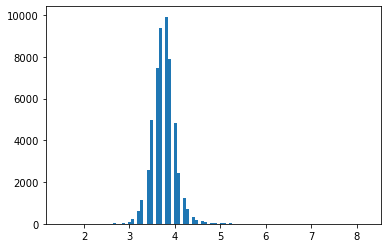

array([[10.,  2.],
       [ 1.,  2.]])

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/earthquake_data.csv'

AttributeError: module 'matplotlib.cbook' has no attribute '_deprecate_privatize_attribute'

AttributeError: module 'matplotlib.cbook' has no attribute '_deprecate_privatize_attribute'